In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [2]:
# Load in the data
covidCrimeData = pd.read_csv('data/ElPasoCovidAndCrimeData.csv', index_col = 0)
covidCrimeData["date"] = pd.to_datetime(covidCrimeData["date"])
print(covidCrimeData.head)

<bound method NDFrame.head of           date  numberOfOffenses  covidDeaths  totalCovidDeaths maskMandate
0   2020-01-22               106            0                 0          No
1   2020-01-23                80            0                 0          No
2   2020-01-24               105            0                 0          No
3   2020-01-25                89            0                 0          No
4   2020-01-26                90            0                 0          No
..         ...               ...          ...               ...         ...
567 2021-08-11                85            1               938          No
568 2021-08-12                78            1               939          No
569 2021-08-13                88            4               943          No
570 2021-08-14                89            0               943          No
571 2021-08-15                97            2               945          No

[572 rows x 5 columns]>


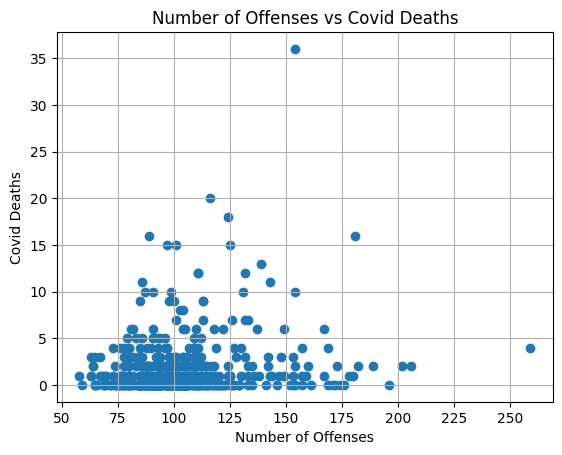

In [3]:
# Scatter plot to check linearity assumption
plt.scatter(covidCrimeData["numberOfOffenses"], covidCrimeData.covidDeaths)
plt.title('Number of Offenses vs Covid Deaths')
plt.xlabel('Number of Offenses')
plt.ylabel('Covid Deaths')
plt.grid(True)
plt.show()

<AxesSubplot: title={'center': 'Histogram of the Number of Offenses'}, ylabel='Frequency'>

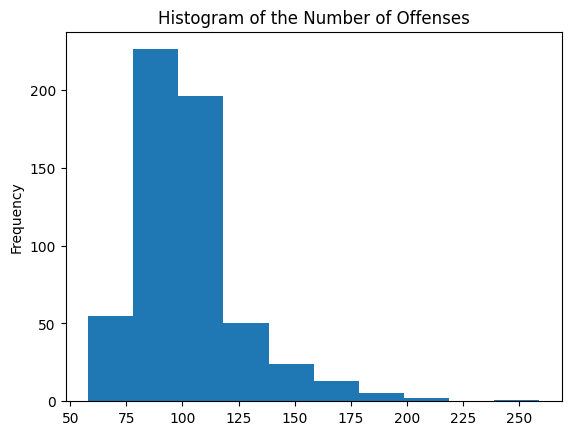

In [4]:
covidCrimeData["numberOfOffenses"].plot(kind = 'hist', xlabel = "Number of Offenses", title = "Histogram of the Number of Offenses")

<AxesSubplot: title={'center': 'Histogram of the Daily Covid Deaths'}, ylabel='Frequency'>

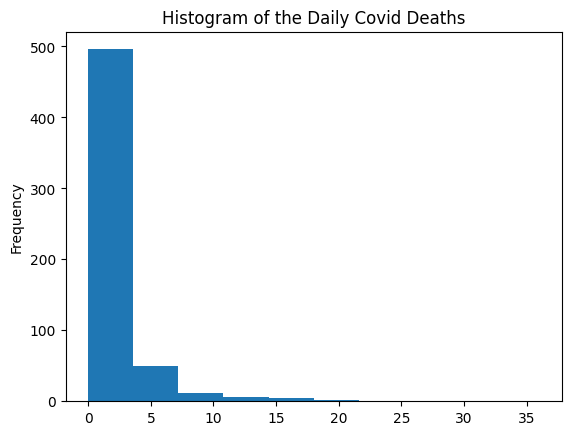

In [5]:
covidCrimeData["covidDeaths"].plot(kind = 'hist', xlabel = "Daily Covid Deaths", title = "Histogram of the Daily Covid Deaths")

<AxesSubplot: title={'center': 'Histogram of the Daily Covid Deaths With No Mask Mandate'}, ylabel='Frequency'>

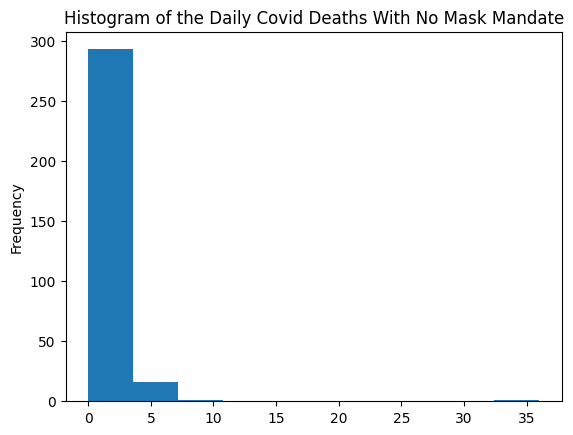

In [6]:
covidCrimeData[covidCrimeData["maskMandate"] == "No"]["covidDeaths"].plot(kind = 'hist', xlabel = "Daily Covid Deaths", title = "Histogram of the Daily Covid Deaths With No Mask Mandate")

<AxesSubplot: title={'center': 'Histogram of the Daily Covid Deaths With a Mask Mandate'}, ylabel='Frequency'>

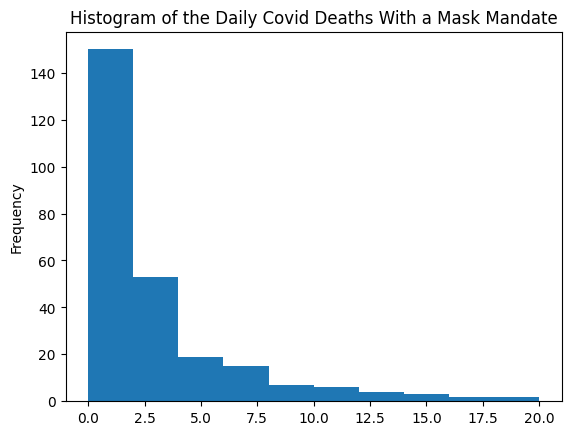

In [7]:
covidCrimeData[covidCrimeData["maskMandate"] == "Yes"]["covidDeaths"].plot(kind = 'hist', title = "Histogram of the Daily Covid Deaths With a Mask Mandate")

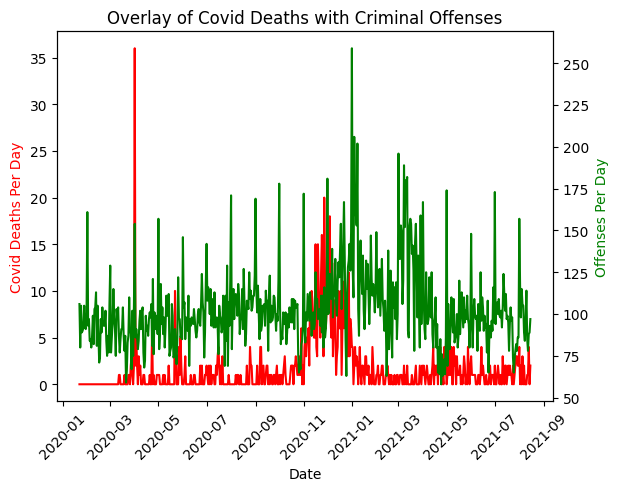

In [8]:
# Plot of covid deaths over number of offenses a day
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax2 = ax1.twinx()
ax1.plot(covidCrimeData["date"], covidCrimeData["covidDeaths"], 'r-')
ax2.plot(covidCrimeData["date"], covidCrimeData["numberOfOffenses"], 'g-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Covid Deaths Per Day', color = 'r')
ax2.set_ylabel("Offenses Per Day", color = 'g')
ax1.set_title('Overlay of Covid Deaths with Criminal Offenses')

plt.show()

In [9]:
# Convert mask mandate to a boolean variable.
covidCrimeData_dummy = pd.get_dummies(covidCrimeData, columns = ["maskMandate"])
covidCrimeData_dummy.drop("maskMandate_No", axis=1, inplace=True)
covidCrimeData_dummy.rename(columns={"maskMandate_Yes": "maskMandate"}, inplace = True)
print(covidCrimeData_dummy.head())

        date  numberOfOffenses  covidDeaths  totalCovidDeaths  maskMandate
0 2020-01-22               106            0                 0            0
1 2020-01-23                80            0                 0            0
2 2020-01-24               105            0                 0            0
3 2020-01-25                89            0                 0            0
4 2020-01-26                90            0                 0            0


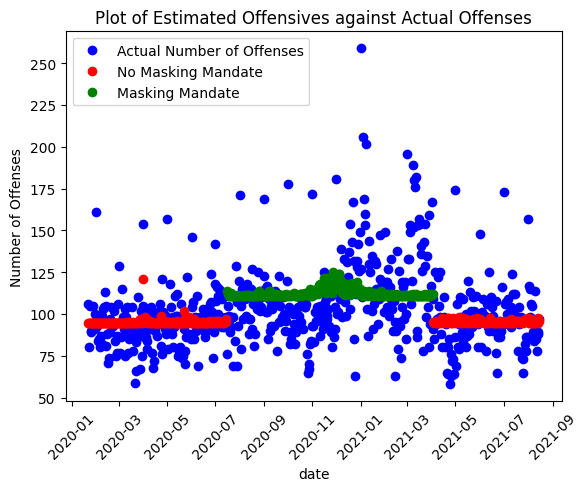

In [10]:
# Create the multiple linear regression model
est = smf.ols(formula='numberOfOffenses ~ covidDeaths + maskMandate', data=covidCrimeData_dummy).fit()

# Make a plot of predicted values against actual values
title = "Plot of Estimated Offensives against Actual Offenses"
xlabel = "date"
ylabel = "Number of Offenses"

plt.plot(covidCrimeData["date"], covidCrimeData["numberOfOffenses"], 'bo', label = "Actual Number of Offenses")
plt.plot(covidCrimeData_dummy["date"][covidCrimeData_dummy["maskMandate"] == 0], est.params[0] + est.params[1] * covidCrimeData_dummy["covidDeaths"][covidCrimeData_dummy["maskMandate"] == 0] + est.params[2] * 0, 'ro', label = "No Masking Mandate")
plt.plot(covidCrimeData_dummy["date"][covidCrimeData_dummy["maskMandate"] == 1], est.params[0] + est.params[1] * covidCrimeData_dummy["covidDeaths"][covidCrimeData_dummy["maskMandate"] == 1] + est.params[2] * 1, 'go', label = "Masking Mandate")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)

plt.xticks(rotation = 45)
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()

In [11]:
# Get model information
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       numberOfOffenses   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     44.80
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           8.55e-19
Time:                        14:26:28   Log-Likelihood:                -2581.8
No. Observations:                 572   AIC:                             5170.
Df Residuals:                     569   BIC:                             5183.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      94.6371      1.291     73.282      0.000      92.101      97.174
covidDeaths     0.7260      0.307      2.362      0.019       0.122       1.330
maskMandate    15.9753      1.911      8.357      0.000      12.221      19.730
==============================================================================
Omnibus:                      203.810   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.703
Skew:                           1.564   Prob(JB):                    6.36e-194
Kurtosis:                       8.248   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1
eval_env: 1
eval_env: 1


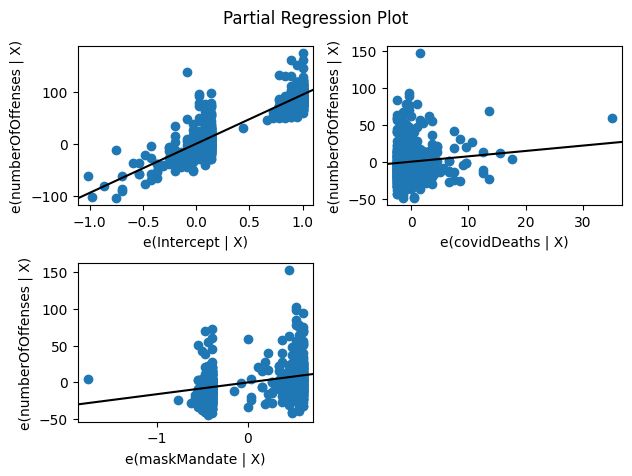

In [12]:
# Plot the residuals
fig = sm.graphics.plot_partregress_grid(est)
fig.tight_layout(pad=1.0)